## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/wikilimo/miniconda3/envs/smos-agb/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
model = 'lightgbm/2_wMonth_noAGB_noLAI'
model_type = 'tropics'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(model, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_July.csv', '/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_Sept.csv', '/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_Oct.csv', '/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_Aug.csv', '/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_Dec.csv', '/home/wikilimo/inference_analysis_ml/lightgbm/2_wMonth_noAGB_noLAI/tropics_output_Nov.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lat,lon,actual_load,predicted_load,APE
0,-29.875,29.125,1.876688e+08,7.193983e+08,283.334060
1,-29.875,29.375,2.971511e+08,3.645562e+08,22.683783
2,-29.875,29.625,1.518198e+08,4.031935e+08,165.573683
3,-29.875,29.875,3.022351e+08,3.297615e+08,9.107589
4,-29.875,30.125,3.009002e+08,3.945340e+08,31.117863
...,...,...,...,...,...
24455,25.875,78.875,1.037343e+08,4.900078e+08,372.368090
24456,26.125,78.625,7.776598e+08,5.748024e+08,26.085619
24457,26.625,-80.625,2.563519e+08,5.178921e+08,102.023948
24458,27.125,83.625,6.130305e+07,3.233876e+09,5175.228684


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1729792182.8655777 and median - 570245850.175499


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1822953846.2611787 and median - 1116351260.591385


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.3657432197786734

### General Trend of Actual and Predicted Values

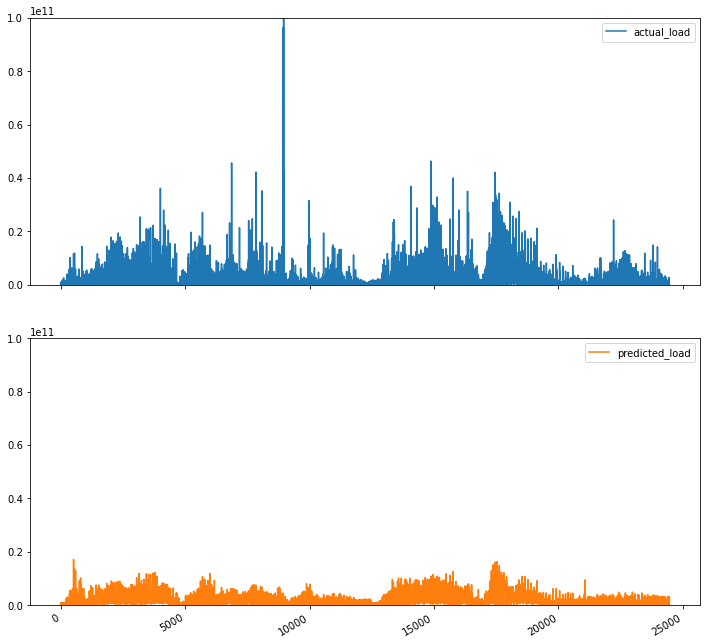

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1e11)

### Distribution of high values (> HIGH_THRESHOLD)

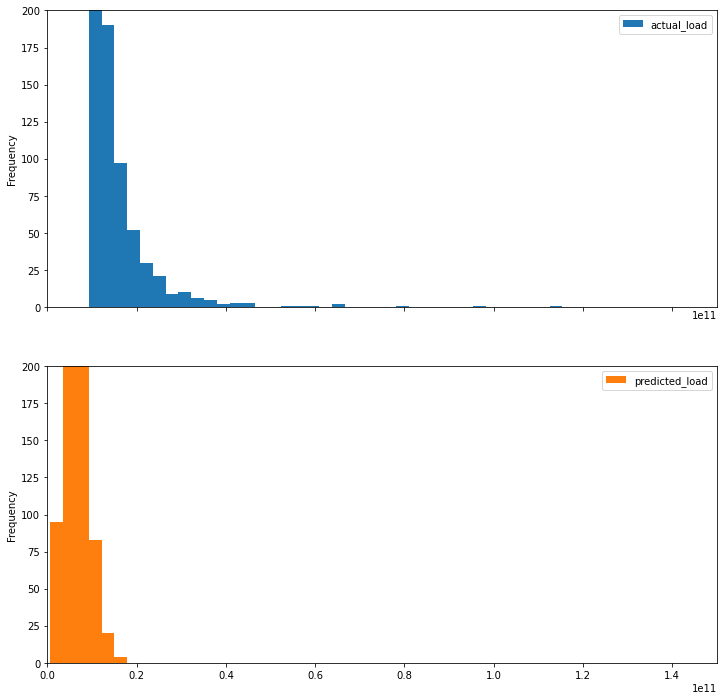

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, subplots=True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 1.5e11)

### Distribution of Errors

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

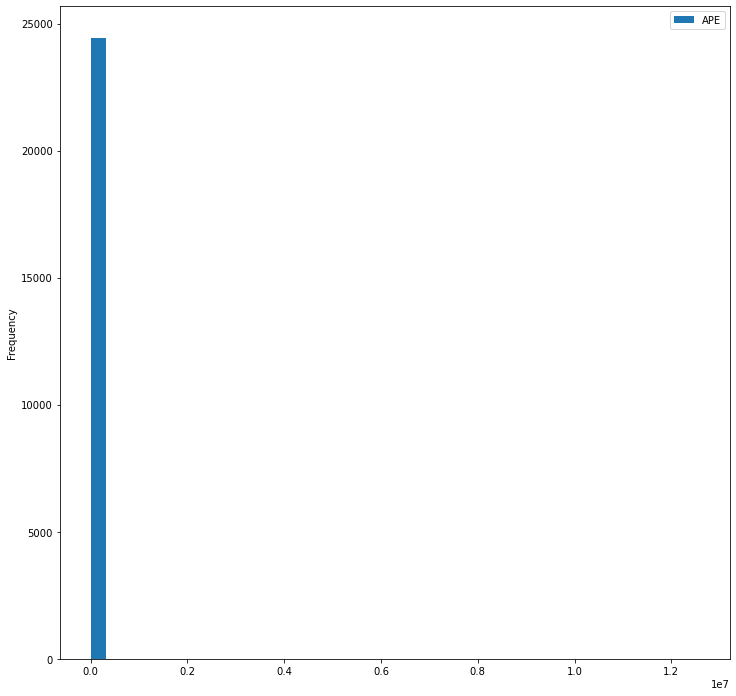

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])
fli_err.plot.hist(bins=40, subplots=True, figsize=(12, 12))

### Error Stats

In [13]:
fli_err.max()

APE    1.257683e+07
dtype: float64

In [14]:
fli_err.mean()

APE    1003.532481
dtype: float64

In [15]:
fli_err.median()

APE    81.352774
dtype: float64